In [38]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [39]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [40]:
df_clean = df.dropna(subset=['director','cast','country','date_added','rating','duration'])

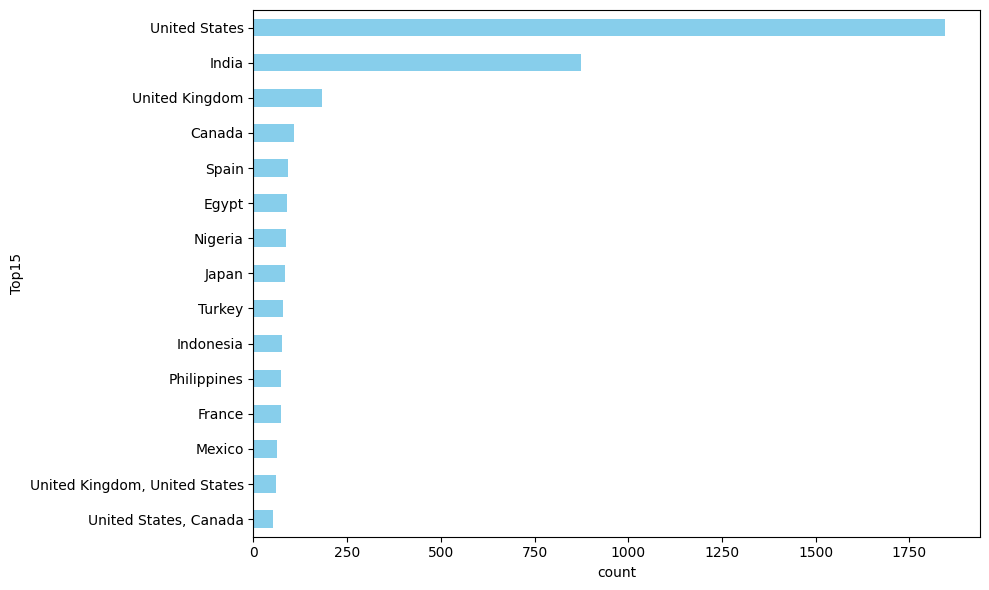

In [41]:
country_count = df_clean['country'].value_counts().head(15)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
country_count.plot(kind='barh',color='skyblue')
plt.xlabel('count')
plt.ylabel('Top15')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [42]:
text = ''.join(df['description'].dropna().str.lower())

import re
from collections import Counter
words = re.findall(r'\b[a-z]{4,}\b', text)
stopwords = set(['the', 'and', 'for', 'with', 'that', 'from', 'this', 'are', 'his', 'her', 'was', 'but', 'have', 'who', 'its', 'after', 'has', 'she', 'their'])
filtered_words = [word for word in words if word not in stopwords]

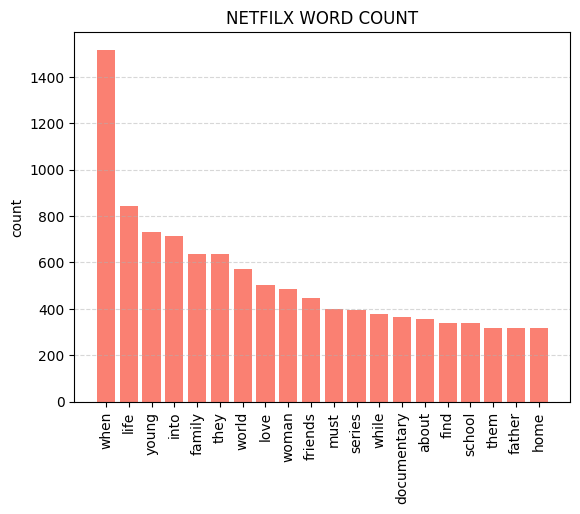

In [43]:
counter = Counter(filtered_words)
common_words = counter.most_common(20)

word,count = zip(*common_words)
plt.Figure(figsize=(10,6))
plt.bar(word,count,color='salmon')
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("NETFILX WORD COUNT")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout
plt.show()

Text(0, 0.5, '')

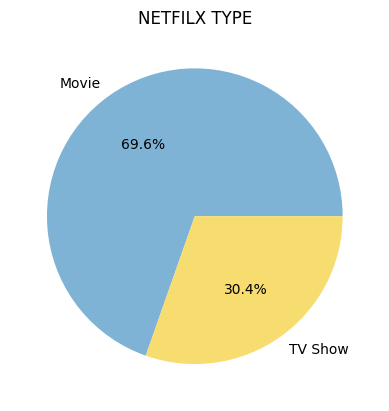

In [44]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['#7FB3D5','#F7Dc6f'])
plt.title('NETFILX TYPE')
plt.ylabel('')


In [45]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(),errors='coerce')
df['year_added'] = df['date_added'].dt.year
year_type_counts = df.groupby(['year_added','type']).size().unstack()

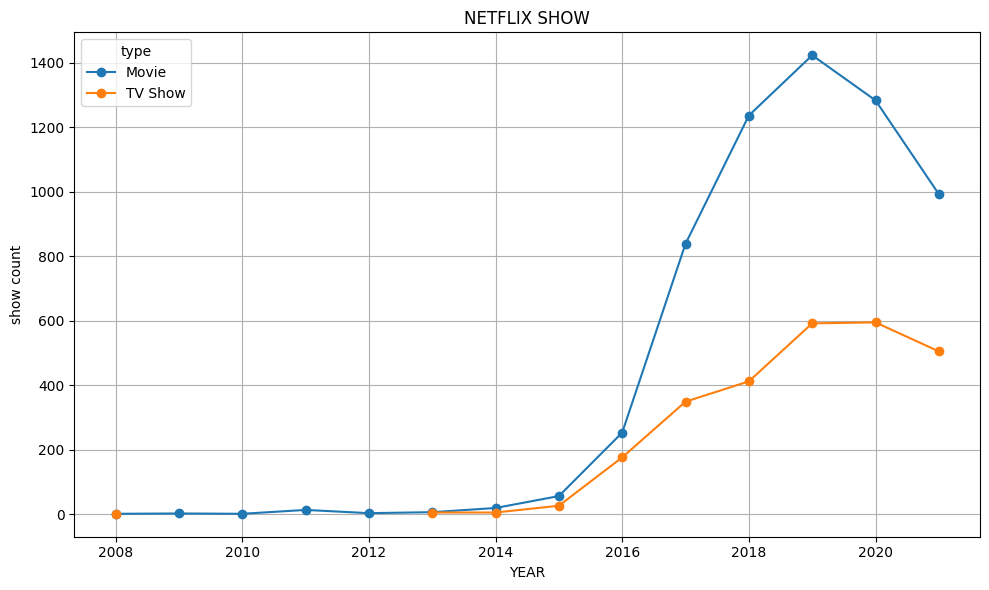

In [49]:
year_type_counts.plot(kind='line', figsize=(10,6), marker='o')

plt.title('NETFLIX SHOW')
plt.xlabel('YEAR')
plt.ylabel('show count')
plt.grid(True)
plt.tight_layout()

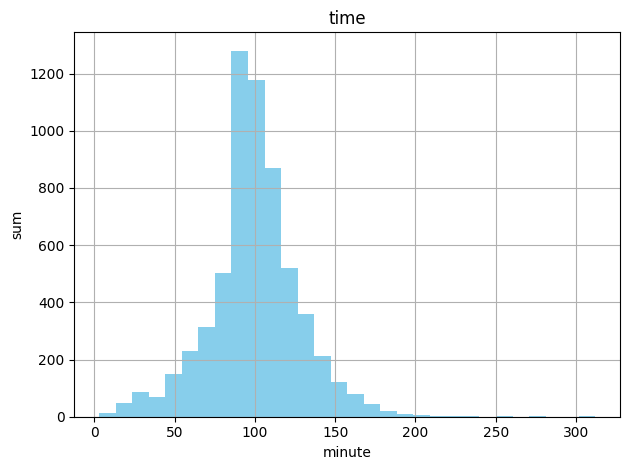

In [51]:
df['duration'].value_counts().head(10)
df_movie = df[df['type'] == 'Movie'].copy()
df_movie['duration_min'] = df_movie['duration'].str.extract(r'(\d+)').astype(float)
df_tv = df[df['type'] == 'TV Show'].copy()
df_tv['num_seasons'] = df_tv['duration'].str.extract(r'(\d+)').astype(float)
plt.hist(df_movie['duration_min'].dropna(), bins=30, color='skyblue')
plt.title('time')
plt.xlabel('minute')
plt.ylabel('sum')
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\a0911\AppData\Local\Temp\ipykernel_6748\2906939138.py:6: UserWarning: Glyph 23395 (\N{CJK UNIFIED IDEOGRAPH-5B63}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a0911\AppData\Local\Temp\ipykernel_6748\2906939138.py:6: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a0911\AppData\Local\Temp\ipykernel_6748\2906939138.py:6: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a0911\AppData\Local\Temp\ipykernel_6748\2906939138.py:6: UserWarning: Glyph 24433 (\N{CJK UNIFIED IDEOGRAPH-5F71}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a0911\AppData\Local\Temp\ipykernel_6748\2906939138.py:6: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\a0911\AppData\Local\Temp\ipykernel_6748\2906939138.py:6: UserWarning: Glyph 20998 (\N{CJK UNIFIE

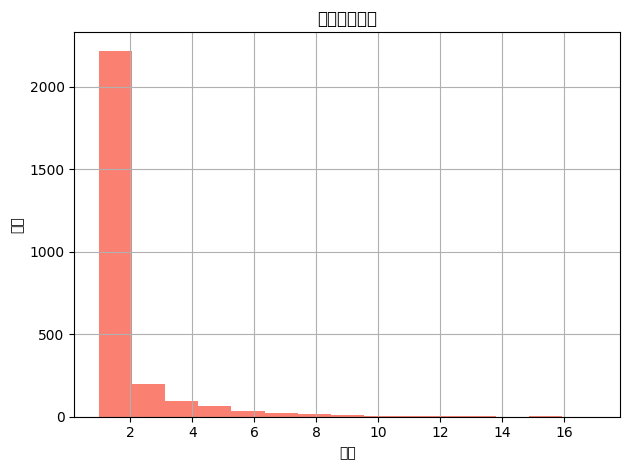

In [52]:
plt.hist(df_tv['num_seasons'].dropna(), bins=15, color='salmon')
plt.title('影集季數分佈')
plt.xlabel('季數')
plt.ylabel('數量')
plt.grid(True)
plt.tight_layout()
plt.show()
